# Pandas Data Analysis Practice Notes

## Change Present Working Directory to Datasets Folder

In [1]:
pwd

'C:\\Users\\Prashanth Reddy'

In [2]:
import os
path = "F:\Courses and Learning\Top Mentor 2022\Batch 68\Course Practice\Practice Datasets"
os.chdir(path) 

In [3]:
pwd

'F:\\Courses and Learning\\Top Mentor 2022\\Batch 68\\Course Practice\\Practice Datasets'

## Display All Files In Current Directory

In [4]:
print(os.listdir())

['cast.csv', 'Retail.xls', 'titles.csv']


## Data Analysis

Importand Steps
1. Make copy of original data file - dont messup with original raw data
2. Check for column data types
3. Check shape of data
4. Check for column names - raname inappropriate column names according to understanding way
5. Check for missing values in each column in dataset - check percentage of misssing values, clean empty values
6. Check for values corrections in each columns - whether it should be in float or integer, spellings, unique values etc
7. Descriptive Statistics

Later Analys as Required - index wise search, column wise search, value wise analysis, sorting index or value wise etc

### Import Pandas and Read File

In [5]:
import pandas as pd
cast = pd.read_csv("cast.csv")
print(cast.head())

                  title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4   NaN
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN


### 1. Make a Copy of Original Raw Data File

In [6]:
copied_cast = cast.copy()
print(copied_cast.head())

                  title  year      name   type                character     n
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4   NaN
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN


### 2. Check for column data types

In [7]:
print(copied_cast.dtypes)

title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object


### 3. Check shape of data

In [8]:
print(copied_cast.shape)

(3611212, 6)


### 4. Check for column names - rename inappropriate column names according to understanding way

In [9]:
print(copied_cast.columns)

Index(['title', 'year', 'name', 'type', 'character', 'n'], dtype='object')


#### Renaming 1 Inappropriate Column Name

In [10]:
copied_cast.rename(columns = {'n':'Rank'}, inplace=True)
print(copied_cast.head())

                  title  year      name   type                character  Rank
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4   NaN
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN


#### Renaming Multiple Column Names

In [11]:
copied_cast = copied_cast.rename(columns={'title':'Title','year':'Year','name':'Name','type':'Type','character':'Character'})
print(copied_cast.head())

                  Title  Year      Name   Type                Character  Rank
0        Closet Monster  2015  Buffy #1  actor                  Buffy 4   NaN
1       Suuri illusioni  1985    Homo $  actor                   Guests  22.0
2   Battle of the Sexes  2017   $hutter  actor          Bobby Riggs Fan  10.0
3  Secret in Their Eyes  2015   $hutter  actor          2002 Dodger Fan   NaN
4            Steve Jobs  2015   $hutter  actor  1988 Opera House Patron   NaN


### 5. Check for Missing Values in Each Column in Dataset and Correct

#### Checking for Null Values

In [12]:
print(copied_cast.isnull())

         Title   Year   Name   Type  Character   Rank
0        False  False  False  False      False   True
1        False  False  False  False      False  False
2        False  False  False  False      False  False
3        False  False  False  False      False   True
4        False  False  False  False      False   True
...        ...    ...    ...    ...        ...    ...
3611207  False  False  False  False      False  False
3611208  False  False  False  False      False  False
3611209  False  False  False  False      False  False
3611210  False  False  False  False      False  False
3611211  False  False  False  False      False   True

[3611212 rows x 6 columns]


#### Finding Total Count of Null Values

In [13]:
print(copied_cast.isnull().sum())

Title              0
Year               0
Name               0
Type               0
Character          0
Rank         1379242
dtype: int64


#### Percentage of Missing Values

In [14]:
print((1379242/3611212)*100) # 38% missing data is very huge #from shape total rows, isnull sum missing count

38.19332678336249


#### Display Null Valued Row 

In [15]:
copied_cast[copied_cast.Year.isnull()==True]

,Title,Year,Name,Type,Character,Rank


#### Filling Zeros to Empty Values

In [16]:
copied_cast.Rank.fillna(0,inplace =True) # or copied_cast['Rank'] = copied_cast.Rank.fillna(0)
print(copied_cast.head(2)) #first 2 records display

#fill zero to entire data frame on all column values where ever empty
# copied_cast.fillna(0)

             Title  Year      Name   Type Character  Rank
0   Closet Monster  2015  Buffy #1  actor   Buffy 4   0.0
1  Suuri illusioni  1985    Homo $  actor    Guests  22.0


In [17]:
# Check for null values if any exists
print(copied_cast.isnull().sum())

Title        0
Year         0
Name         0
Type         0
Character    0
Rank         0
dtype: int64


#### Dropping Empty Rows

In [18]:
copied_cast.dropna()

,Title,Year,Name,Type,Character,Rank
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,0.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,0.0
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,0.0
...,...,...,...,...,...,...
3611207,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3611208,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3611209,Skammdegi,1985,Dalla ??r?ard?ttir,actress,Hj?krunarkona,9.0
3611210,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


#### Back Fill and Front Fill

In [19]:
#Demonstrating Back Fill and Front Fill by Making Short DataSet from Orignal Data Set
demo_data=cast.head(10)  # only 10 rows will be in demo_data now
demo_data

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,NaN
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,NaN
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,NaN
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


In [20]:
#Front Fill
demo_data.fillna(method='ffill')

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,10.0
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,10.0
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,10.0
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,10.0
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,10.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',9.0


In [21]:
#Back Fill
demo_data.fillna(method='bfill')

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,22.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,9.0
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,9.0
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,9.0
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,9.0
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,9.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',NaN


#### Mean, Mode or Unique Fill

In [22]:
#Mean finding
found_mean = demo_data.n.mean()
print("mean of n column: ",found_mean)

#Mean filling convention
demo_data.n.fillna(found_mean)

mean of n column:  13.666666666666666


0    13.666667
1    22.000000
2    10.000000
3    13.666667
4    13.666667
5    13.666667
6    13.666667
7    13.666667
8     9.000000
9    13.666667
Name: n, dtype: float64

In [23]:
#Mode or high frequency value fill - this kind work for year filling like cant be filled with mean 
#Check number of unique year values and in each unique year how many records are there
copied_cast.Year.value_counts()

2016    178217
2015    149596
2014    147878
2013    138976
2012    133912
         ...  
1907         5
1909         3
1894         3
1900         2
1905         1
Name: Year, Length: 121, dtype: int64

In [24]:
# Unique finding from type coloumn - if only one type is there can be type filled for missing field with that bfill or ffil
# For authentic columns like name, title, character cant be used any of this technique to fill missings, they are authentic.
demo_data.type.unique()

array(['actor'], dtype=object)

### 6. Check for Value Corrections in Each Columns 

#### Change Data Type

In [25]:
copied_cast.Year = copied_cast.Year.astype("int")
print(copied_cast.head(10))

                                               Title  Year  \
0                                     Closet Monster  2015   
1                                    Suuri illusioni  1985   
2                                Battle of the Sexes  2017   
3                               Secret in Their Eyes  2015   
4                                         Steve Jobs  2015   
5                             Straight Outta Compton  2015   
6                             Straight Outta Compton  2015   
7                                     For Thy Love 2  2009   
8  Lapis, Ballpen at Diploma, a True to Life Journey  2014   
9                                       Desire (III)  2014   

                        Name   Type                               Character  \
0                   Buffy #1  actor                                 Buffy 4   
1                     Homo $  actor                                  Guests   
2                    $hutter  actor                         Bobby Riggs Fan   
3

#### Check Unique Values

In [26]:
# Can be checked column wise only, cant be checked on entire data frame
copied_cast.Name.unique()  

array(['Buffy #1', 'Homo $', '$hutter', ..., 'Dalla ??r?ard?ttir',
       'Krist?n Andrea ??r?ard?ttir', 'Rosa ? R?gvu'], dtype=object)

In [27]:
# unique value count
copied_cast.Name.nunique()

1322023

#### Value Corrections With Small Data Frame Demonstration

In [28]:
# Creating new dataframe
demo=pd.DataFrame({'Gender':['Male','male','m','Male'],'Age':[20,21,23,25]})

In [29]:
# Displaying new dataframe
print(demo)

  Gender  Age
0   Male   20
1   male   21
2      m   23
3   Male   25


In [30]:
# Checking unique values by column wise - check any dublicasy, misspelling, case duplicity etc
# observe column Gender:  like Male male m like this correct them to lower upper etc
demo.Gender.unique()

array(['Male', 'male', 'm'], dtype=object)

In [31]:
# Using string methods to correct
# 1. str.lower() for lowercase
# 2. str.upper() for uppercase
# 3. str.title() for titlecase , like proper() in excel
# use str upon column names: < dataframe.column-name.string.stringmethod() >
demo.Gender = demo.Gender.str.title()
print(demo)

  Gender  Age
0   Male   20
1   Male   21
2      M   23
3   Male   25


In [32]:
# Replace incorrect values can be done by - single row or multiple rows
# 1. Using numpy module ifs
# 2. using string replace
# 3. accessing row or index and changing that - tried own worked
# 4. using column name - tried own not working

In [33]:
# 1.Using Numpy
import numpy as np
numpy_changed=demo.copy()
numpy_changed.Gender=np.where(demo['Gender']=='M','Male','Male') # condition, x or y
print(numpy_changed)

# or demo.Gender=np.where(demo['Gender'=='M','Male','Male'])
# just for separate checks copied to numpy_changed

  Gender  Age
0   Male   20
1   Male   21
2   Male   23
3   Male   25


In [34]:
# 2. Using String Replace
replace_demo=demo.copy()
replace_demo.Gender = replace_demo.Gender.replace('M','Male')
print(replace_demo)

  Gender  Age
0   Male   20
1   Male   21
2   Male   23
3   Male   25


In [35]:
# 3. Using Indexing - if one index one value replaces, if multiple choosen range or indexes then multple replaces
#index_demo.loc[2].Gender='Male' #1.gives warning no output,2.works if all are strings in that row, no numerics as observed
index_demo=demo.copy()
index_demo.loc[2,'Gender']='Male'
print(index_demo)

  Gender  Age
0   Male   20
1   Male   21
2   Male   23
3   Male   25


In [36]:
# 4. Using Column Name - Not Working

# Not Working for exactly changing one field in row
# column_demo=demo.copy()
# column_demo[column_demo['Gender']=='M']['Gender']='Male'

# complete row values get effected
column_demo2=demo.copy()
column_demo2[column_demo2['Gender']=='M']='Male'
print(column_demo2)

  Gender   Age
0   Male    20
1   Male    21
2   Male  Male
3   Male    25


### 7. Descriptive Statistics

In [37]:
copied_cast.describe(include='all')

,Title,Year,Name,Type,Character,Rank
count,3611212,3.611212e+06,3611212,3611212,3611212,3.611212e+06
unique,172294,NaN,1322023,2,1535711,NaN
top,Around the World in Eighty Days,NaN,Bess Flowers,actor,Himself,NaN
freq,1298,NaN,818,2440028,19486,NaN
mean,NaN,1.988072e+03,NaN,NaN,NaN,1.038871e+01
std,NaN,2.786198e+01,NaN,NaN,NaN,2.640489e+01
min,NaN,1.894000e+03,NaN,NaN,NaN,0.000000e+00
25%,NaN,1.969000e+03,NaN,NaN,NaN,0.000000e+00
50%,NaN,2.000000e+03,NaN,NaN,NaN,4.000000e+00
75%,NaN,2.011000e+03,NaN,NaN,NaN,1.300000e+01


## Analysis By Individual Values or Names

In [49]:
# Display total values of a data frame
copied_cast

,Title,Year,Name,Type,Character,Rank
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,0.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,0.0
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,0.0
...,...,...,...,...,...,...
3611207,Foxtrot,1988,Lilja ??risd?ttir,actress,D?ra,24.0
3611208,Niceland (Population. 1.000.002),2004,Sigr??ur J?na ??risd?ttir,actress,Woman in Bus,26.0
3611209,Skammdegi,1985,Dalla ??r?ard?ttir,actress,Hj?krunarkona,9.0
3611210,U.S.S.S.S...,2003,Krist?n Andrea ??r?ard?ttir,actress,Afgr.dama ? bens?nst??,17.0


In [51]:
# Check unique values in Movie Titles
copied_cast.Title.unique()

array(['Closet Monster', 'Suuri illusioni', 'Battle of the Sexes', ...,
       'Familia tortuga', 'Hubungan jenayah', 'Allahaismarladik'],
      dtype=object)

In [75]:
# Choose one value and store in another dataframe - way 1
bots=copied_cast[copied_cast.Title.str.startswith("Battle of the Sexes")].head(50)
bots

,Title,Year,Name,Type,Character,Rank
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
46586,Battle of the Sexes,2017,Nawras Alzubaidy,actor,Cheerleader,0.0
71906,Battle of the Sexes,2017,Aaron Archuletta,actor,Tennis Fan,0.0
83617,Battle of the Sexes,2017,Robert Artz,actor,Florida Tennis Match Specator,0.0
109909,Battle of the Sexes,2017,Max Bahmani,actor,VIP,0.0
109910,Battle of the Sexes,2017,Max Bahmani,actor,Former Tennis Pro,0.0
148609,Battle of the Sexes,2017,Jeff (II) Baumann,actor,Male Chauvinist Pig,0.0
199133,Battle of the Sexes,2017,Mark (II) Birch,actor,Male Reporter,0.0
239696,Battle of the Sexes,2017,Michael Bova,actor,Man At Diner Counter,0.0
256271,Battle of the Sexes,2017,Josh Breeding,actor,Nervous 3rd AD,0.0


In [92]:
# Choose one value and store in another dataframe - way 2
closet_monster=copied_cast[copied_cast['Title']=='Closet Monster']
closet_monster

,Title,Year,Name,Type,Character,Rank
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,0.0
5685,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,3.0
404116,Closet Monster,2015,Chunk (III),actor,Buffy 1,0.0
717785,Closet Monster,2015,Teigan Follett,actor,Greg,0.0
751094,Closet Monster,2015,Jack (IV) Fulton,actor,Young Oscar,7.0
928450,Closet Monster,2015,James Hawksley,actor,Andrew,10.0
1066718,Closet Monster,2015,Connor Jessup,actor,Oscar Madly (18),1.0
1366963,Closet Monster,2015,Mama (VI),actor,Buffy 2,0.0
1524157,Closet Monster,2015,Ross (II) Moore,actor,Newlywed Man,0.0
1566221,Closet Monster,2015,Tim Myles,actor,Student,0.0


In [94]:
# Observe the indexes are not in order, reset them in new data frame
closet_monster=closet_monster.reset_index()
closet_monster

,index,Title,Year,Name,Type,Character,Rank
0,0,Closet Monster,2015,Buffy #1,actor,Buffy 4,0.0
1,5685,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,3.0
2,404116,Closet Monster,2015,Chunk (III),actor,Buffy 1,0.0
3,717785,Closet Monster,2015,Teigan Follett,actor,Greg,0.0
4,751094,Closet Monster,2015,Jack (IV) Fulton,actor,Young Oscar,7.0
5,928450,Closet Monster,2015,James Hawksley,actor,Andrew,10.0
6,1066718,Closet Monster,2015,Connor Jessup,actor,Oscar Madly (18),1.0
7,1366963,Closet Monster,2015,Mama (VI),actor,Buffy 2,0.0
8,1524157,Closet Monster,2015,Ross (II) Moore,actor,Newlywed Man,0.0
9,1566221,Closet Monster,2015,Tim Myles,actor,Student,0.0


In [97]:
# Remove extra column index
closet_monster.drop('index',axis=1,inplace=True)

KeyError: "['index'] not found in axis"

In [100]:
# Display corrected new data frame
closet_monster

,Title,Year,Name,Type,Character,Rank
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,0.0
1,Closet Monster,2015,Aaron Abrams,actor,Peter Madly,3.0
2,Closet Monster,2015,Chunk (III),actor,Buffy 1,0.0
3,Closet Monster,2015,Teigan Follett,actor,Greg,0.0
4,Closet Monster,2015,Jack (IV) Fulton,actor,Young Oscar,7.0
5,Closet Monster,2015,James Hawksley,actor,Andrew,10.0
6,Closet Monster,2015,Connor Jessup,actor,Oscar Madly (18),1.0
7,Closet Monster,2015,Mama (VI),actor,Buffy 2,0.0
8,Closet Monster,2015,Ross (II) Moore,actor,Newlywed Man,0.0
9,Closet Monster,2015,Tim Myles,actor,Student,0.0


In [103]:
# Analys total rank value for each unique year for closet monster data frame
closet_monster.groupby('Year').Rank.sum()

Year
2015    55.0
Name: Rank, dtype: float64

In [116]:
# Analysing by column name search - its slower than loc and iloc or say index search
closet_monster[closet_monster.Name=='Chunk (III)'] #it will give n records if where ever name match the given value

,Title,Year,Name,Type,Character,Rank
2,Closet Monster,2015,Chunk (III),actor,Buffy 1,0.0


In [117]:
# Amalysing by indexing - change Name column as index
closet_monster=closet_monster.set_index("Name")
closet_monster

,Title,Year,Type,Character,Rank
Name,,,,,
Buffy #1,Closet Monster,2015,actor,Buffy 4,0.0
Aaron Abrams,Closet Monster,2015,actor,Peter Madly,3.0
Chunk (III),Closet Monster,2015,actor,Buffy 1,0.0
Teigan Follett,Closet Monster,2015,actor,Greg,0.0
Jack (IV) Fulton,Closet Monster,2015,actor,Young Oscar,7.0
James Hawksley,Closet Monster,2015,actor,Andrew,10.0
Connor Jessup,Closet Monster,2015,actor,Oscar Madly (18),1.0
Mama (VI),Closet Monster,2015,actor,Buffy 2,0.0
Ross (II) Moore,Closet Monster,2015,actor,Newlywed Man,0.0


In [118]:
# Analysing by index - finding by index
closet_monster.loc['Chunk (III)']

Title        Closet Monster
Year                   2015
Type                  actor
Character           Buffy 1
Rank                    0.0
Name: Chunk (III), dtype: object

## Analysis By Pandas Graphs

In [149]:
# Selecting first 50 records from dataframe and making new dataframe for demonstration
pg=copied_cast.head(50).copy()

# Displaying new demonstration dataframe pg
pg

,Title,Year,Name,Type,Character,Rank
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,0.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,0.0
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,0.0
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,0.0
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,0.0
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,0.0
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',0.0


In [153]:
# check descriptive statistics - observe min and max years
pg.describe()

,Year,Rank
count,50.000000,50.00000
mean,2004.900000,14.40000
std,14.616527,19.33908
min,1963.000000,0.00000
25%,2000.250000,0.00000
50%,2011.000000,9.00000
75%,2014.750000,21.00000
max,2017.000000,80.00000


In [156]:
# creating bin ranges for year
bins=[1960,1980,2000,2020]
pg['year_range']=pd.cut(pg['Year'],bins)
pg

,Title,Year,Name,Type,Character,Rank,year_range
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,0.0,"(2000, 2020]"
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,"(1980, 2000]"
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,"(2000, 2020]"
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,0.0,"(2000, 2020]"
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,0.0,"(2000, 2020]"
5,Straight Outta Compton,2015,$hutter,actor,Club Patron,0.0,"(2000, 2020]"
6,Straight Outta Compton,2015,$hutter,actor,Dopeman,0.0,"(2000, 2020]"
7,For Thy Love 2,2009,Bee Moe $lim,actor,Thug 1,0.0,"(2000, 2020]"
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0,"(2000, 2020]"
9,Desire (III),2014,Syaiful 'Ariffin,actor,Actor Playing Eteocles from 'Antigone',0.0,"(2000, 2020]"


In [157]:
# Find out how many records each year group having
pg.year_range.value_counts()

(2000, 2020]    37
(1980, 2000]     7
(1960, 1980]     6
Name: year_range, dtype: int64

<AxesSubplot:>

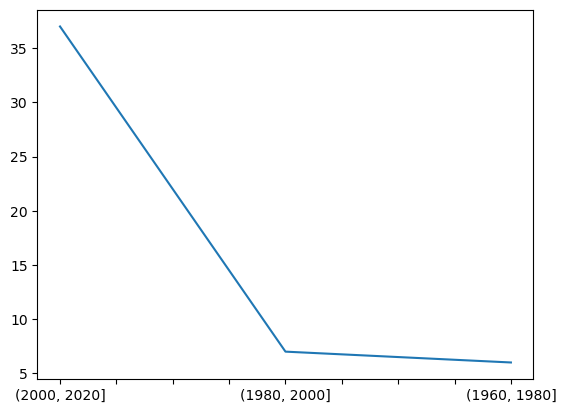

In [158]:
# ploting year range using pandas line plot - default is line plot
pg.year_range.value_counts().plot()

<AxesSubplot:>

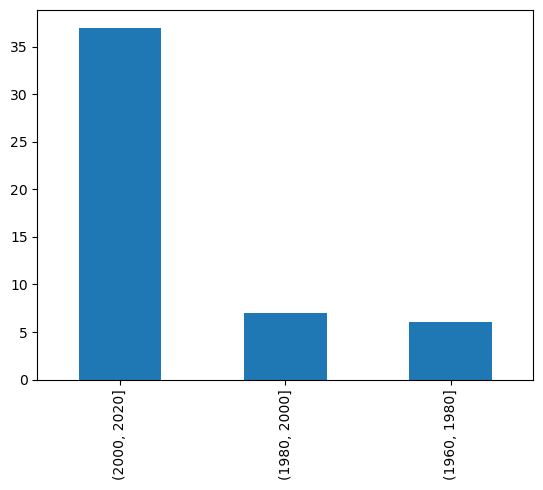

In [159]:
# plotting year range using pandas bar graph
pg.year_range.value_counts().plot(kind='bar')

## Analysis By Seaborn Graphs

1. Seaborn is used for visual graphs
2. These graphs are not like tableau, just for quick short analaysis or presentatin this can be used
3. Same graphs as tableau somehow but these are simple graphs not that much interactive as tableau graphs

#### Importing Seaborn

In [39]:
import seaborn as sb

#### Check Available Functions in Seaborn

In [40]:
dir(sb)

['FacetGrid',
 'JointGrid',
 'PairGrid',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_core',
 '_decorators',
 '_docstrings',
 '_orig_rc_params',
 '_statistics',
 'algorithms',
 'axes_style',
 'axisgrid',
 'barplot',
 'blend_palette',
 'boxenplot',
 'boxplot',
 'categorical',
 'catplot',
 'choose_colorbrewer_palette',
 'choose_cubehelix_palette',
 'choose_dark_palette',
 'choose_diverging_palette',
 'choose_light_palette',
 'clustermap',
 'cm',
 'color_palette',
 'colors',
 'countplot',
 'crayon_palette',
 'crayons',
 'cubehelix_palette',
 'dark_palette',
 'desaturate',
 'despine',
 'displot',
 'distplot',
 'distributions',
 'diverging_palette',
 'dogplot',
 'ecdfplot',
 'external',
 'factorplot',
 'get_data_home',
 'get_dataset_names',
 'heatmap',
 'histplot',
 'hls_palette',
 'husl_palette',
 'jointplot',
 'kdeplot',
 'light_palette',
 'lineplot',
 'lmplot',
 'load_dataset',
 'matrix',

#### See Datasets Inbuilt Came with Seabron Package

In [41]:
sb.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

#### Load tips Dataset and Practice

In [42]:
# Loading dataset
tips = sb.load_dataset('tips')

# Displaying loaded dataset
print(tips)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]


#### 1. countplot

Total Males and Females
Male      157
Female     87
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='count'>

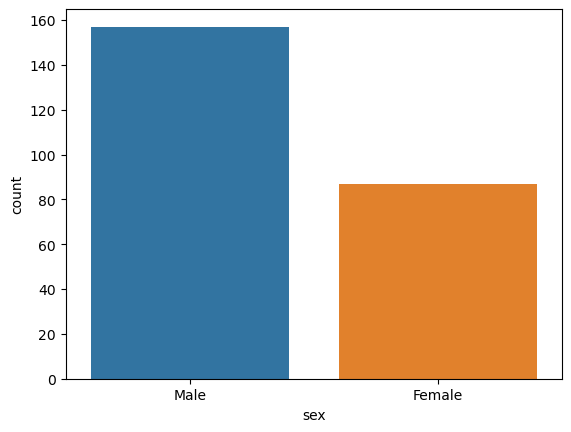

In [141]:
# Find out number of males and females 
print("Total Males and Females")
print(tips.sex.value_counts())

# Plotting graph of the total male and females
# used countplot since only 1 column non integer we considered to plot, for barplot atleast 1 integer column required to plot
sb.countplot(x=tips['sex'])

#### 2. barplot

Gender Wise Total Bill Paid
sex
Male      3256.82
Female    1570.95
Name: total_bill, dtype: float64


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

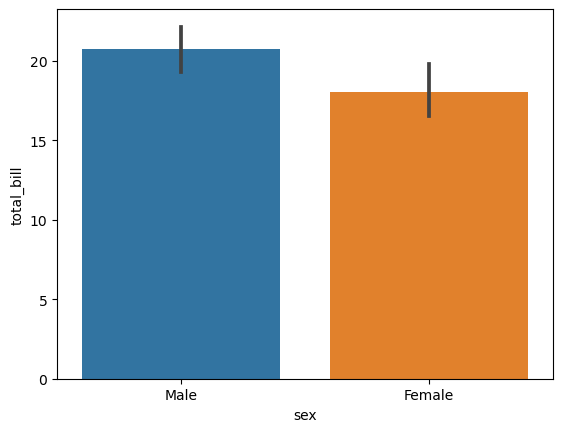

In [139]:
# Find out gender wise total bill paid
print("Gender Wise Total Bill Paid")
print(tips.groupby('sex').total_bill.sum())

# Plotting graph to show gender wise total bill paid - default estimator will be mean, so values differ for total_bill paid
sb.barplot(x='sex',y='total_bill',data=tips)

Gender Wise Total Bill Paid
sex
Male      3256.82
Female    1570.95
Name: total_bill, dtype: float64


<AxesSubplot:xlabel='sex', ylabel='total_bill'>

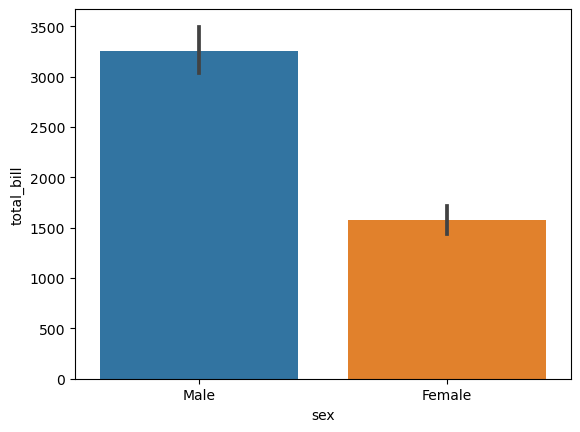

In [161]:
# Actual values of gender wise total bill paid
print("Gender Wise Total Bill Paid")
print(tips.groupby('sex').total_bill.sum())

# Plotting graph that show actul amount of total bill gender wise analysis - not mean of values
sb.barplot(x='sex',y='total_bill',data=tips,estimator=sum)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

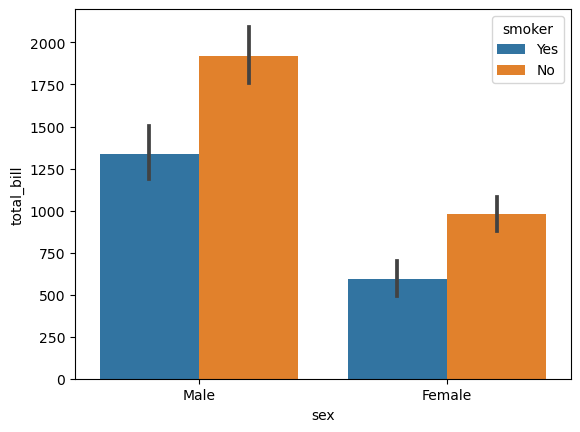

In [165]:
# Showing in graph gender wise total bill paid and gender wise distribute smoker stats yes or no
# color wise segregates
sb.barplot(x='sex',y='total_bill',data=tips,hue='smoker',estimator=sum)

#### 3. scatterplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

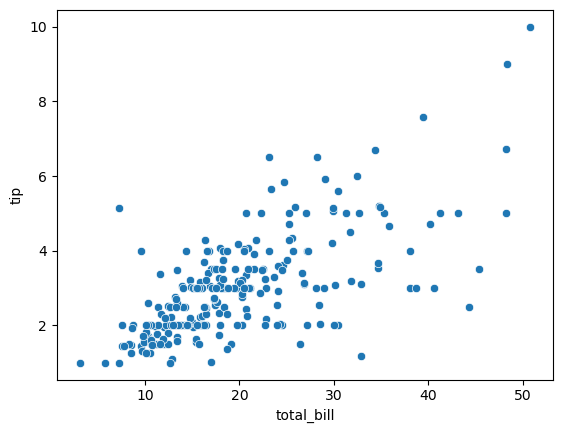

In [169]:
# scatterd dots graph 
sb.scatterplot(x='total_bill',y='tip',data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

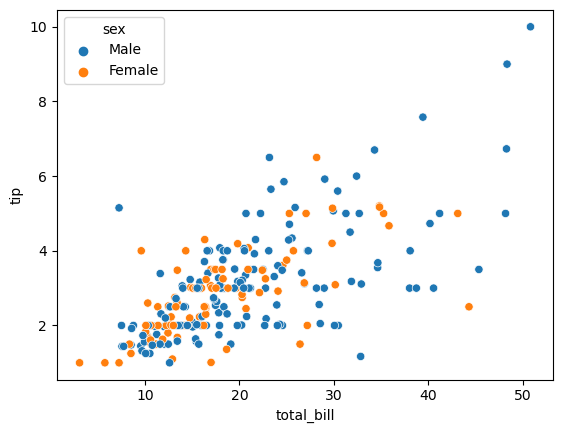

In [191]:
# scattered plot with gender segregation
# observed highest bill paid and tips given by males only
# positively corelated upward trend
sb.scatterplot(x='total_bill',y='tip',data=tips,hue='sex')

<AxesSubplot:xlabel='size', ylabel='tip'>

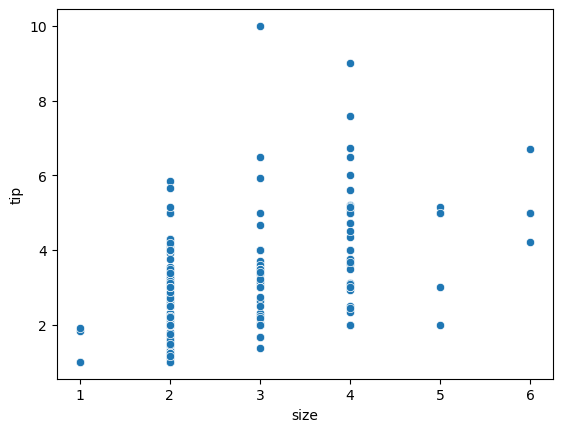

In [195]:
# scatter plot for seeing trend between size of table and tips
# observe table size 3 and 4 are more likely high tips given
sb.scatterplot(x='size',y='tip',data=tips)

#### 4. pairplot

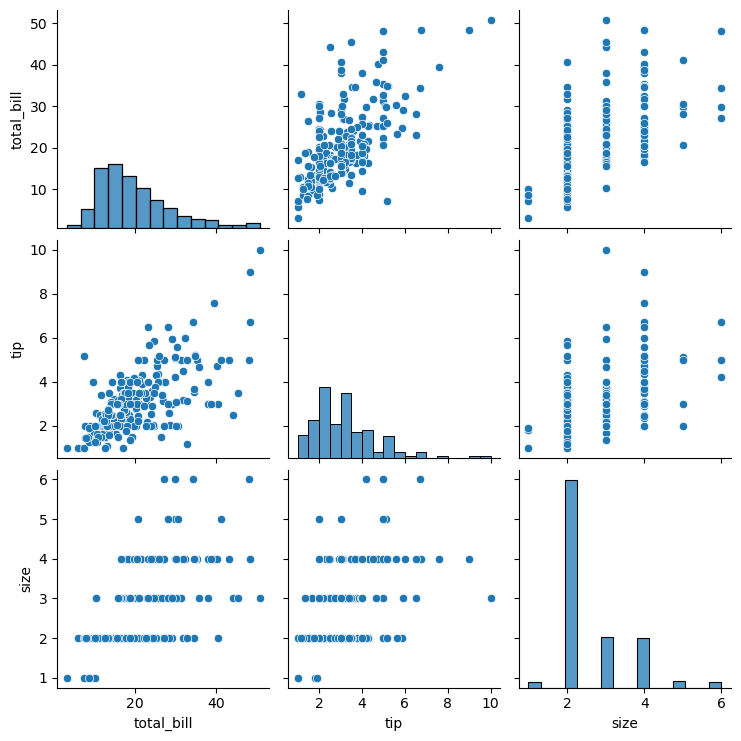

In [172]:
# Very important plot - plots automatically all possible graphs to analyse trend easily whether positive or negative
# plots only for numerical columns compared with each other numerical columns
# observe distribution and scatter graphs
sb.pairplot(tips)

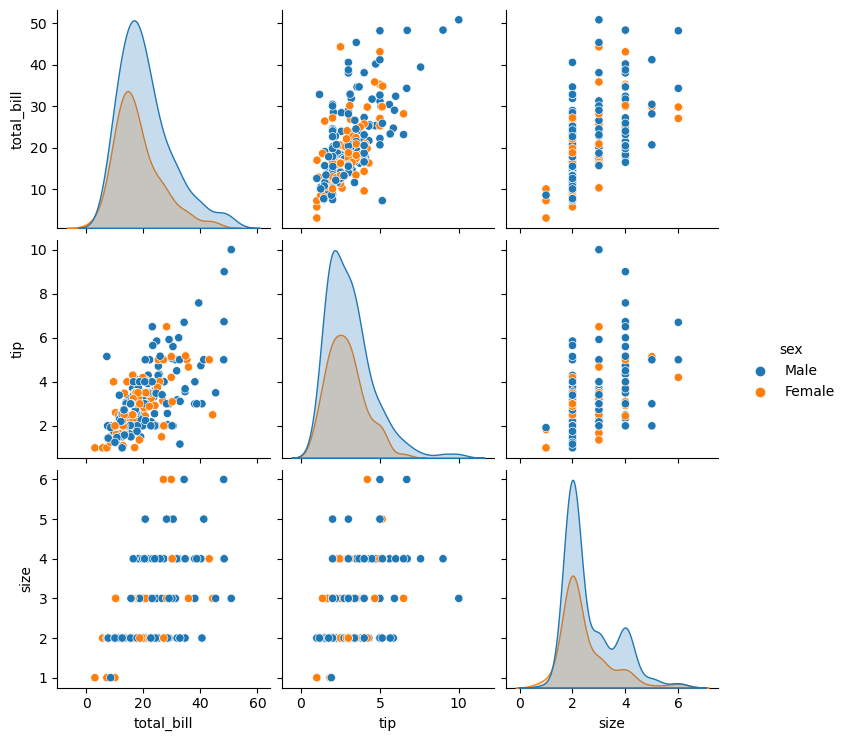

In [174]:
# Gender wise segregations of pairplot
# observed total_bill distribution is slightly normal, but slightly right wards curve looks like in size ( table seater size ) 
sb.pairplot(tips,hue='sex')

#### 5. heatmap

In [175]:
# to predict tips = size of table and total_bill are very important parameters
# find co-relations in general way
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


<AxesSubplot:>

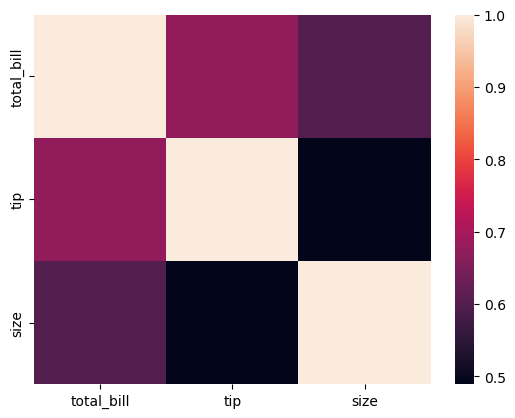

In [176]:
# Co-relation in graphical matrix visual way representation
sb.heatmap(tips.corr())

<AxesSubplot:>

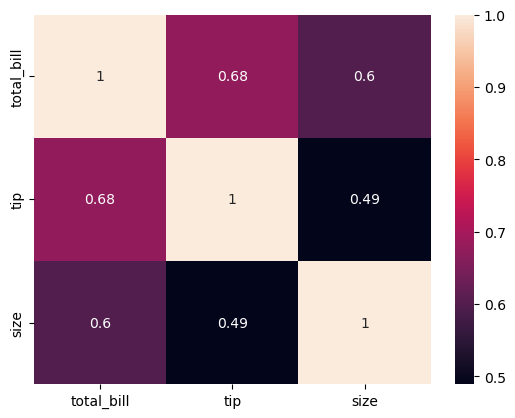

In [187]:
# Providing annotations for heatmap corelations
# observe - total_bill increases tip also increases, both are directly proportional to each other, 68% corelation between them
sb.heatmap(tips.corr(),annot=True)

<AxesSubplot:>

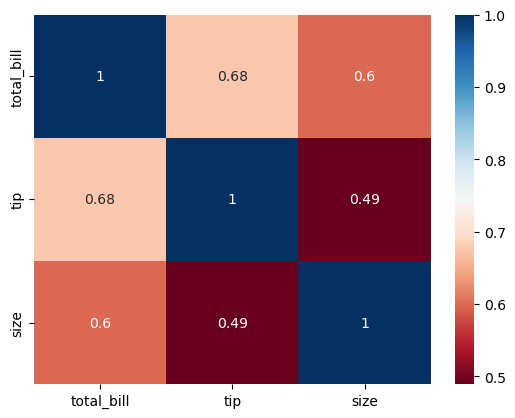

In [196]:
# changing color for heatmap using color mapping i,e cmap
# check for cmap color palette for more colors on google if needed
# Rd=red, Bu=blue, given red blue combination for heatmap
# reflecting upward trend or positive trend or negative trend in percentages of corealations in heatmap
sb.heatmap(tips.corr(),annot=True,cmap="RdBu")

<AxesSubplot:>

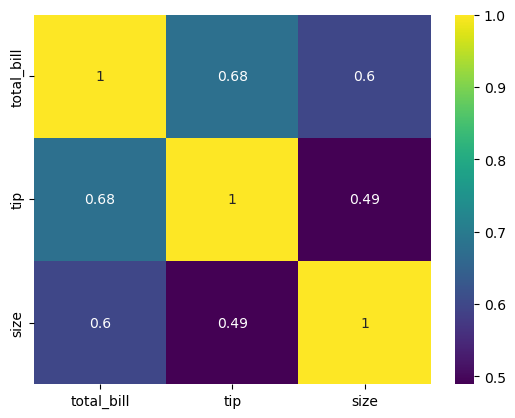

In [190]:
# changing color for heatmap
sb.heatmap(tips.corr(),annot=True,cmap='viridis')

#### 6. displot or distplot

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

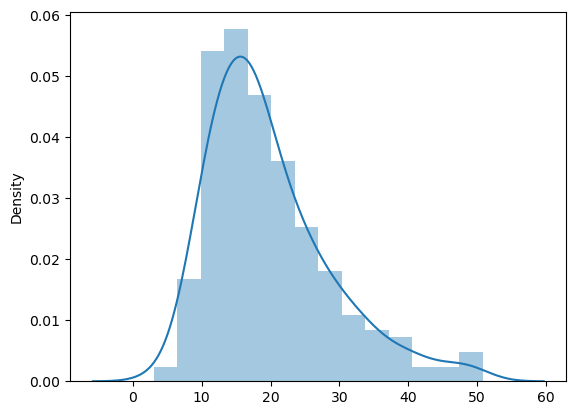

In [181]:
# For textual columns we can basically do counts, but for numerical columns we can do more than that
# we can find distributions also
sb.distplot(x=tips.total_bill) 

# distplot is depricated and removed in future versions, but now its working
# its proper distribution, leave histogram , front line is density curve, highest peak is the mean 

In [186]:
# mean finding for total bill - near to 20, also graph density curve represent it, more total bills are near to 20 ruppes etc
# total bills are near to mean
tips.total_bill.mean()

19.785942622950824

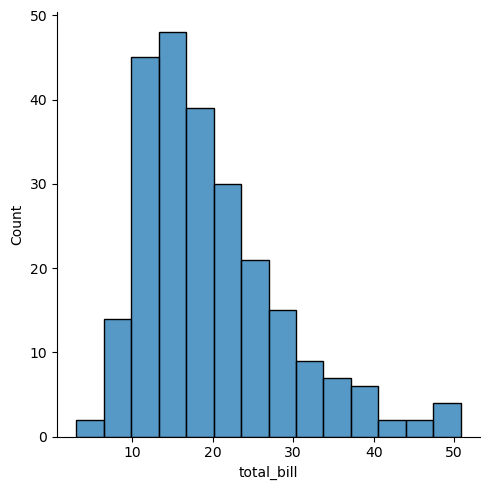

In [180]:
# using displot to find out the distribution of total_bill
sb.displot(x=tips.total_bill)